In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5000 

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

### Step 1
fill in ticker, exp: 'cobr.l' 

name variable and variable_2020

# <---------- NEED TO CHANGE THE TICKER

In [2]:
avo = yf.Ticker('avo.L')
avo_2020 = avo.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
print(avo_2020.shape)
print(avo_2020.head())
print(avo_2020.tail())

(334, 7)
            Open       High        Low  Close  Volume  Dividends  Stock Splits
Date                                                                          
2020-01-02  40.0  40.990002  39.155998   39.5   84487          0             0
2020-01-03  39.0  39.950001  39.099998   39.0   10636          0             0
2020-01-06  39.0  39.950001  38.520000   39.0   24397          0             0
2020-01-07  39.0  40.000000  38.549999   39.0   31805          0             0
2020-01-08  39.0  39.750000  38.799999   39.0  210953          0             0
            Open       High        Low  Close  Volume  Dividends  Stock Splits
Date                                                                          
2021-04-21  38.5  38.250000  37.250000   37.5  133480          0             0
2021-04-22  37.5  37.479000  34.125000   34.5  365921          0             0
2021-04-23  34.5  37.849998  34.500000   37.0  264764          0             0
2021-04-26  37.0  37.849998  36.000000   37

###  Step 2
##### prepare placing data. 
1. create new column names: colname_mmyy = 'xxx' (Pay attention on this col name, they will appear in the legend later in the plot) ; create placing date: placing_date_mmyy = 'xxx' ; create raise price: rprice_mmyy = int/float

2. replace dataframe name with xx_2020 above

3. How many placing you want to plot, how many times repeating this step

# <---------- NEED TO CHANGE THE TICKER AND THINGS

In [3]:
# placing1, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
colname_placing_1 = 'Placing_Price_Nov'
placing_1_date = '2020-11-30'
rprice_1 = 30.0

# replace df names
avo_2020[colname_placing_1] = rprice_1

avo_2020.loc[avo_2020.index <= placing_1_date, colname_placing_1] = None

In [4]:
# placing2, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
colname_placing_2 = 'Placing_Price_Jan_21'
placing_2_date = '2021-01-30'
rprice_2 = 40.0

# replace df names
avo_2020[colname_placing_2] = rprice_2

avo_2020.loc[avo_2020.index <= placing_2_date, colname_placing_2] = None

In [5]:
# # placing_3, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
# colname_placing_3 = 'Placing_Price_Dec'
# placing_3_date = '2020-12-30'
# rprice_3 = 3

# # replace df names
# cobr_2020[colname_placing_3] = rprice_3

# cobr_2020.loc[cobr_2020.index <= placing_3_date, colname_placing_3] = None

### Step 3

get the latest highest 'Close' price and its index in the dataframe

# <---------- NEED TO CHANGE THE TICKER 


In [6]:
# 情况，出现两个highest points, I choose the latest one [-1].
# hcp stands for hightest close price
hcp_idx = avo_2020[avo_2020['Close'] == avo_2020.Close.max()].index[-1]
hcp = np.round(avo_2020.Close.max(),2)
print(hcp)
print(hcp_idx)

47.5
2021-01-08 00:00:00


In [7]:
# cobr_2020

### Plotting
1. make a copy: df = xx_2020
2. change plot_title = 'xx_Placing_History' , find this in CONTRAL PANEL

In [8]:
df = avo_2020                        # <---------- DON'T FORGET TO CHANGE NAME

In [9]:
from matplotlib.font_manager import _rebuild

_rebuild()

In [10]:
from matplotlib.font_manager import FontProperties

In [11]:
ChineseFont = FontProperties('SimHei')

In [12]:
# plt.rcParams['font.sans-serif'] = ['SimHei']     # 引入加载字体名
# plt.rcParams['axes.unicode_minus'] = False     

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


In [14]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

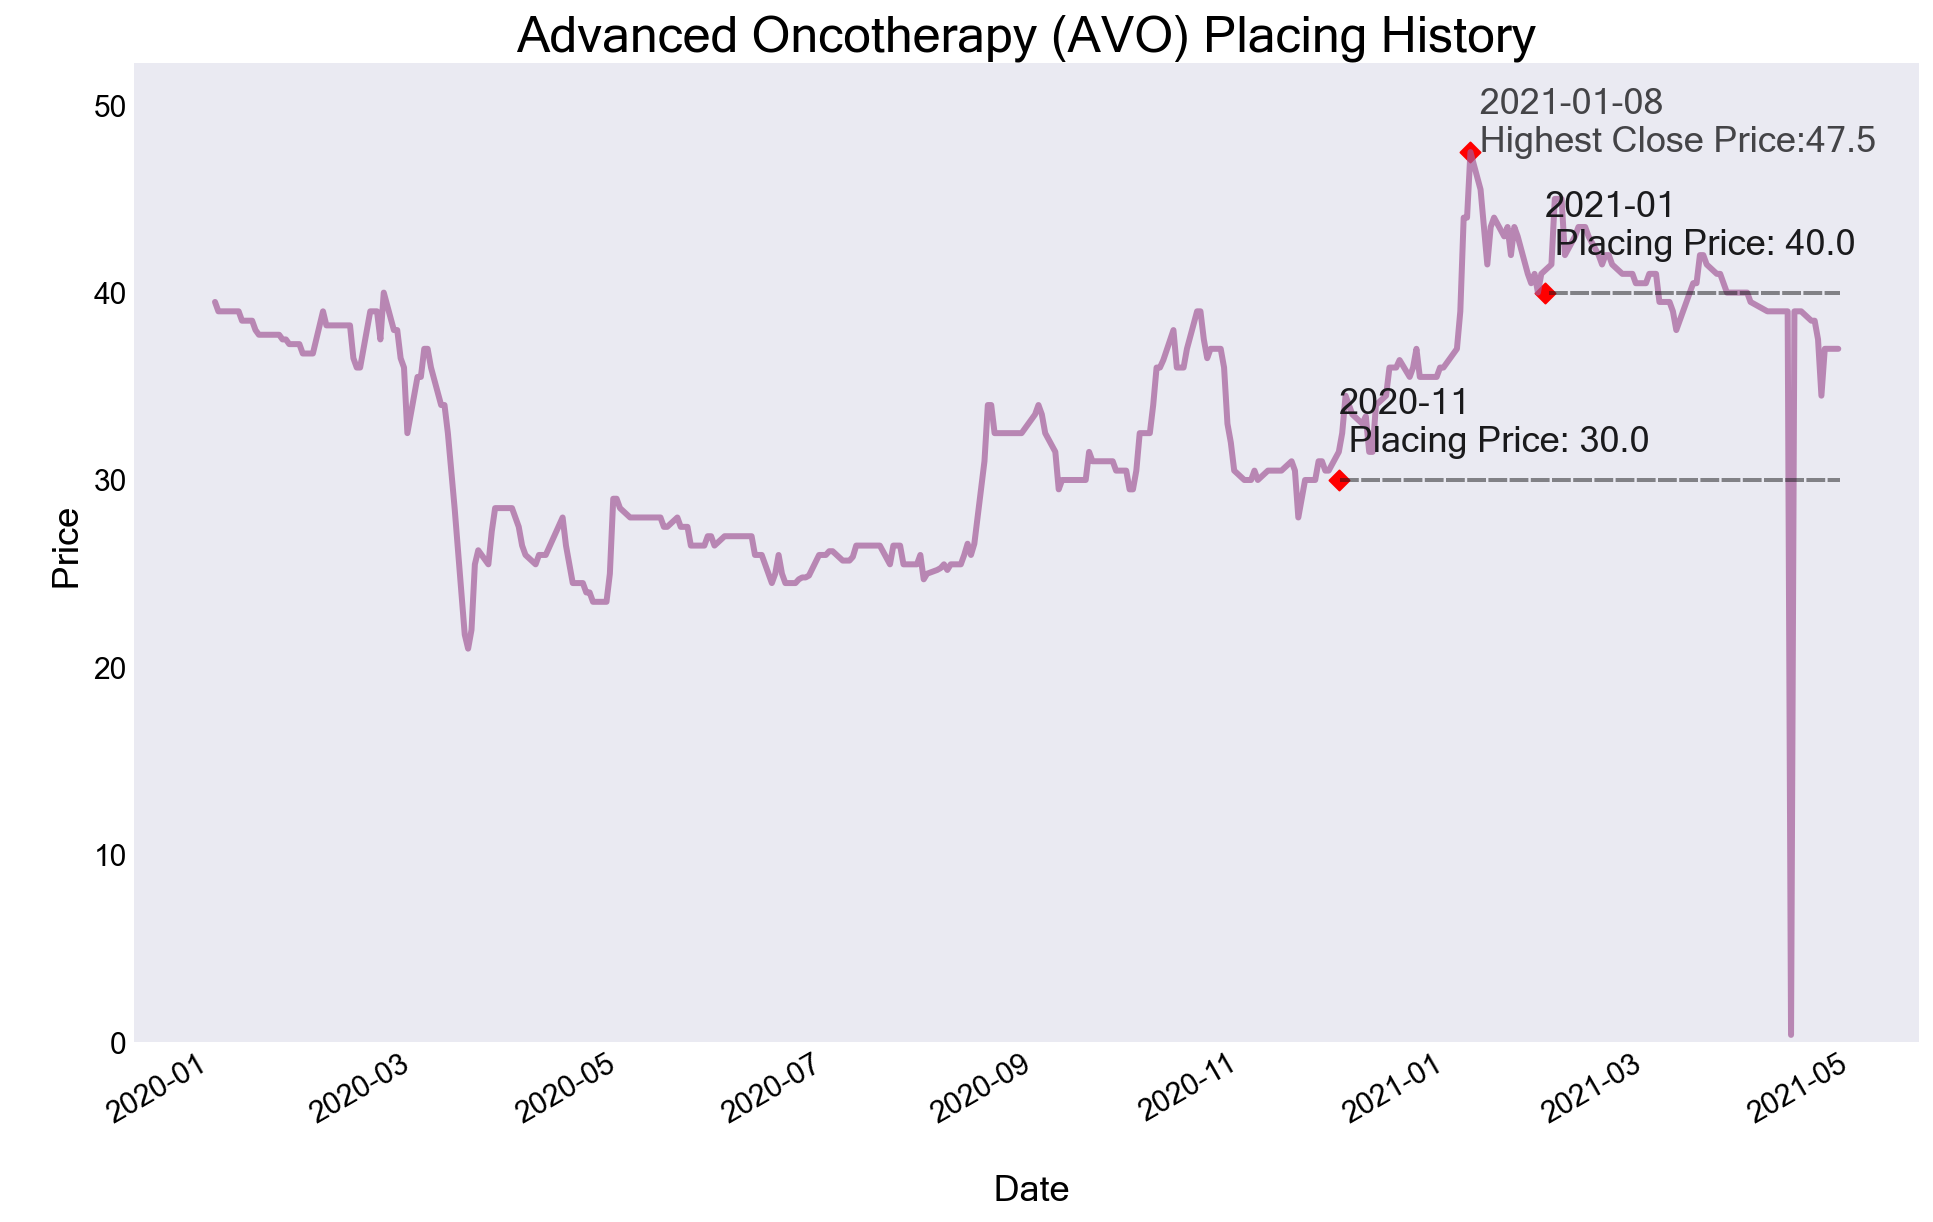

In [26]:
# size and style
# popular sytles: 'fivethirtyeight', 'seaborn-dark','seaborn','Seaborn-dark','seaborn-poster','seaborn-ticks',
# 'seaborn-white','fast','seaborn-whitegrid','dark_background','classic','bmh','Solarize_Light2'
plt.figure(figsize=(16,10) , frameon=False) 
plt.style.use('seaborn-dark')         # <---------- CHOOSE WISELY

#______________________________________________________________________________________

# CONTRAL PANEL
plot_title = 'Advanced Oncotherapy (AVO) Placing History'    # <---------- NEED CHANGING THE TICKER
clr_title = 'k'

# colour scheme control
clr_close = '#a45c99'                   # <---------- NEED TO MATCH THE COLOUR
alpha_close = 0.7

clr_placing1 = '#1a1a1c'
alpha_placing1_text = 1
alpha_placing1_line = 0.5

clr_placing2 = '#1a1a1c'
alpha_placing2_text = 1
alpha_placing2_line = 0.5

clr_placing3 = '#1a1a1c'
alpha_placing3_text = 1
alpha_placing3_line = 0.7

clr_hcp = '#1a1a1c'
alpha_hcp = 0.8


# font 'Marion','optima','Comic Sans MS','Trebuchet MS','Microsoft Sans Serif'
font = 'Microsoft Sans Serif'

#______________________________________________________________________________________

# plot the close price
df.Close.plot( color=clr_close, alpha=alpha_close, linewidth=3)

# marker <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.scatter(placing_1_date, rprice_1, color='r', marker='D', s=50);
plt.scatter(placing_2_date, rprice_2, color='r', marker='D', s=50);
# plt.scatter(placing_3_date, rprice_3, color='r', marker='D', s=50);

# h-line <---------- CHECK HOW MANY PLACINGS ARE THERE
df[placing_1_date:][colname_placing_1].plot( color= clr_placing1, alpha=alpha_placing1_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
df[df.index >= placing_2_date][colname_placing_2].plot( color=clr_placing2, alpha=alpha_placing2_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
# df[df.index >= placing_3_date][colname_placing_3].plot( color=clr_placing3, alpha=alpha_placing3_line, linewidth=3, ls='dashed',dash_capstyle='projecting')

# text <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.text(placing_1_date, rprice_1+ rprice_1*0.05, '{} \n Placing Price: {}'.format(placing_1_date[:7],rprice_1), fontsize=18, color= clr_placing1, alpha=alpha_placing1_text, fontname=font)
plt.text(placing_2_date, rprice_2+ rprice_2*0.05, '{} \n Placing Price: {}'.format(placing_2_date[:7],rprice_2), fontsize=18, color= clr_placing2, alpha=alpha_placing2_text, fontname=font)
# plt.text(placing_3_date, rprice_3+ rprice_3*0.05, '{} \n Placing Price: {}'.format(placing_3_date[:7], rprice_3), fontsize=18, color= clr_placing3, alpha=alpha_placing3_text, fontname=font)


# highest close price point
plt.scatter(hcp_idx, hcp , color='r', marker='D', s=50);
plt.text(hcp_idx, hcp , ' {}\n Highest Close Price:{}'.format(str(hcp_idx)[:10], hcp),fontname=font, fontsize=18, color=clr_hcp, alpha = alpha_hcp)

# title
plt.title('{}'.format(plot_title), fontsize=25, color=clr_title, fontname=font)

# legend
# plt.legend(loc=(0.8,0.05), fontsize=12, frameon=True, fancybox=True,shadow=True, framealpha=None, facecolor='inherit')

# Y axis
plt.yticks(fontsize=15,color='k')
plt.ylim(0,df.Close.max()+df.Close.max()*0.1)
plt.ylabel('\n Price', fontsize=18,fontname=font, color='k')

# X axis
plt.xticks( fontsize=15,color='k', rotation=30)
plt.xlabel('\n Date', fontsize=18,fontname=font, color='k')

# save as png
plt.savefig('{}'.format(plot_title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()


In [16]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

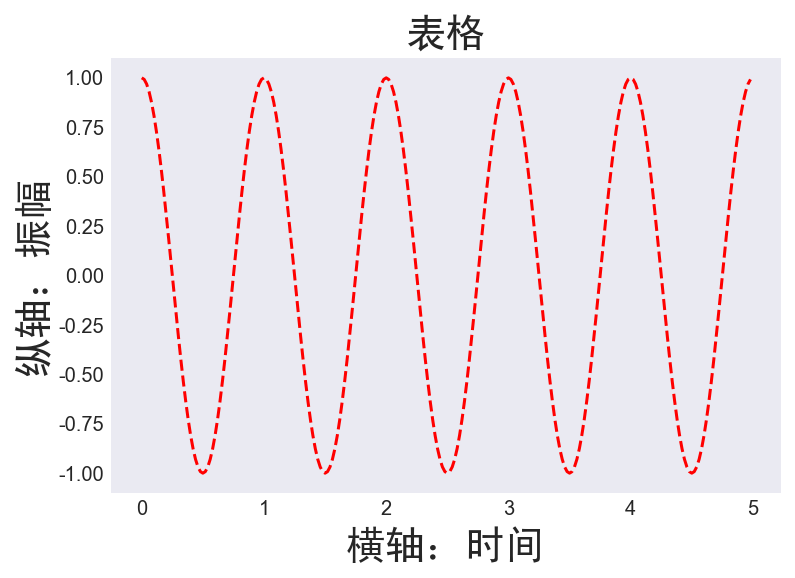

In [19]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0.0,5.0,0.02)
plt.title('表格', fontproperties = 'SimHei',fontsize = 20)
plt.xlabel('横轴：时间',fontproperties = 'SimHei',fontsize = 20)
plt.ylabel('纵轴：振幅',fontproperties = 'SimHei',fontsize = 20)
plt.plot(a,np.cos(2*np.pi*a),'r--')
plt.show()